
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=10>
    Deep Learning - HW4 <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    winter 2024<br>
<font color=3C99D size=5>
    Practical Assignment 1 <br>
<font color=696880 size=4>
    Niloufar Abbasi

____

# Emotion Recognition with Recurrent Neural Networks


---

## **Introduction**

In this task, you will implement a Recurrent Neural Network (RNN) to perform tweet emotion recognition. The goal is to classify tweets into one of six basic emotions:
- **0: sadness**
- **1: joy**
- **2: love**
- **3: anger**
- **4: fear**
- **5: surprise**

We will be using a dataset of tweets, where each tweet has been labeled with one of these emotions. Throughout this notebook, you will follow step-by-step instructions to build and train your model. As you progress, you'll complete the provided TODO sections by filling in the necessary code and functions.

By the end of this exercise, you will:
- Understand how to preprocess text data for use in RNN models.
- Build and train a model using Pytorch.
- Evaluate the performance of your model on the test set.

---


---

## Task 1: Enter Your Information

Before we begin, please enter your **student ID** and **name** in the code section below.

Make sure to replace the placeholders with your actual information.

---

In [1]:
#########################################
# TODO: Enter your personal information #
#########################################

student_name = "Amirparsa Bahrami"
student_id   = 401101332

print("Your name:", student_name)
print("Your student ID:", student_id)

Your name: Amirparsa Bahrami
Your student ID: 401101332


---

## Task 2: Setup and Imports

In this task, we'll be preparing our environment by importing the necessary libraries. Please run the cells below to set everything up. If any library is missing on your end, make sure to install it.

### Instructions:
1. **Run the cells** to install any required packages and import the necessary libraries.
2. If any library is not installed in your environment, use `!pip install <library_name>` to install it.
---

In [2]:
# Install necessary libraries
!pip install datasets
!pip install torch
!pip install transformers
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


Required Libraries:

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from datasets import load_dataset
from transformers import BertTokenizerFast

%matplotlib inline

#####################################################################
# TODO: Add any additional libraries you may need for your analysis #
#####################################################################

# You can add your libraries here

### Additional Functions

The following functions have been provided to help you visualize the results of your model training. These will allow you to analyze both the model's performance over time (through the training history) and how well it performs on individual predictions (through a confusion matrix).

1. **`plot_history(hist)`**: This function takes the training history object (`hist`) from your model and plots both the accuracy and loss over the number of epochs for both training and validation sets. It provides an easy way to visually track the model's learning progress and performance.

2. **`visualize_confusion_matrix(actual_labels, predicted_labels, classes)`**: After making predictions with your model, you can use this function to plot a confusion matrix. It shows the accuracy of your model across each class, helping to identify areas where the model is performing well and where it might be struggling. The matrix is normalized to make comparisons easier.

These functions are for your convenience, you can directly use them after running your model to visualize the results.


In [4]:
# Functions to visualize training history and confusion matrix
def plot_history(hist):
    epochs = len(hist.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs), hist.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs), hist.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs), hist.history.get('loss'), label='Training')
    plt.plot(range(0, epochs), hist.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def visualize_confusion_matrix(actual_labels, predicted_labels, classes):

    cm = confusion_matrix(actual_labels, predicted_labels, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


---

## Task 3: Importing Data

In this task, we will

- import the Tweet Emotion dataset

- create training, validation, and test sets
    
- extract the tweets and their corresponding labels for further analysis

---

In [5]:
dataset = load_dataset('emotion')
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
# Display the first few samples
print(dataset['train'][0:5])  # Adjust 'train' to 'test' or other splits if necessary

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [7]:
###########################################################################
# TODO: Create variables for the training, validation, and test datasets. #
###########################################################################

training = dataset['train']
validation = dataset['validation']
test = dataset['test']


In [8]:
########################################################################################################
# TODO:                                                                                                #
# Implement the `extract_tweets_labels` function to iterate over the provided dataset.                 #
# Within this function, extract the tweet text and their corresponding labels into two separate lists. #
# Then, call this function with the training dataset to obtain the tweets and labels,                  #
# ensuring proper data handling for subsequent analysis.                                               #
########################################################################################################

def extract_tweets_labels(data):
    # Extract the text and labels from the data
    tweets = data['text']
    labels = data['label']
    return tweets, labels

# Get the tweets and labels from the training set
train_tweets, train_labels = extract_tweets_labels(training)

# Display the first tweet and its label
print(train_tweets[0], train_labels[0])


i didnt feel humiliated 0


---

## Task 4: Tokenization of Tweets

In this section, we will focus on the tokenization of the tweets in the dataset. Tokenization is a crucial step in natural language processing (NLP) that involves breaking down text into smaller units, such as words or subwords. This process enables the model to better understand and analyze the text data.

### Objectives:
1. Implement a tokenizer to convert the tweet texts into tokens.
2. Ensure the tokenization process handles various aspects of the text, such as punctuation and special characters.

By the end of this task, you will have a set of tokenized tweets ready for further processing in your NLP pipeline.

---

In [9]:
###############################################################################################################################################
# TODO: Tokenization of Tweets                                                                                                                #
# 1. Select a Tokenization Method: Choose a suitable tokenization method to preprocess the tweets.                                            #
# Ensure that the tokenization handles special characters and maintains the integrity of the text data.                                       #
# 2. Implement the Tokenizer: Once you have selected a method, implement the tokenizer to convert the tweet texts into sequences of tokens.   #
# 3. Test the Tokenization:                                                                                                                   #
# Verify the functionality of your tokenizer by applying it to a sample tweet from the dataset and displaying the resulting tokenized output. #
###############################################################################################################################################

# Initialize the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Example of tokenizing a sample tweet
sample_tweet = train_tweets[0]
tokenized_output = tokenizer.tokenize(sample_tweet)
print(f"Original Tweet: {sample_tweet}")
print(f"Tokenized Output: {tokenized_output}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Original Tweet: i didnt feel humiliated
Tokenized Output: ['i', 'didn', '##t', 'feel', 'humiliated']


Explanation:

Choosing the Tokenizer:
We selected the BERT tokenizer (BertTokenizerFast) because it's efficient and provides subword tokenization, which handles out-of-vocabulary words effectively.
Implementing the Tokenizer:
The tokenizer converts the tweet into tokens, handling punctuation and special characters gracefully. For example, "ex-boyfriend" is tokenized into ['ex', '-', 'boyfriend'].
Testing the Tokenizer:
By tokenizing a sample tweet, we ensure that the tokenizer is functioning as expected, correctly handling various textual elements.


---

## Task 5: Padding and Truncating Sequences

In this task, we will prepare the tokenized tweets for model training by checking their lengths and creating padded sequences.

1. **Checking the Length of the Tweets**
   - Analyze the distribution of tweet lengths to understand the range of token counts in the dataset.

2. **Creating Padded Sequences**
   - After tokenizing the tweets, sequences of different lengths must be adjusted to a uniform length to facilitate training.

---


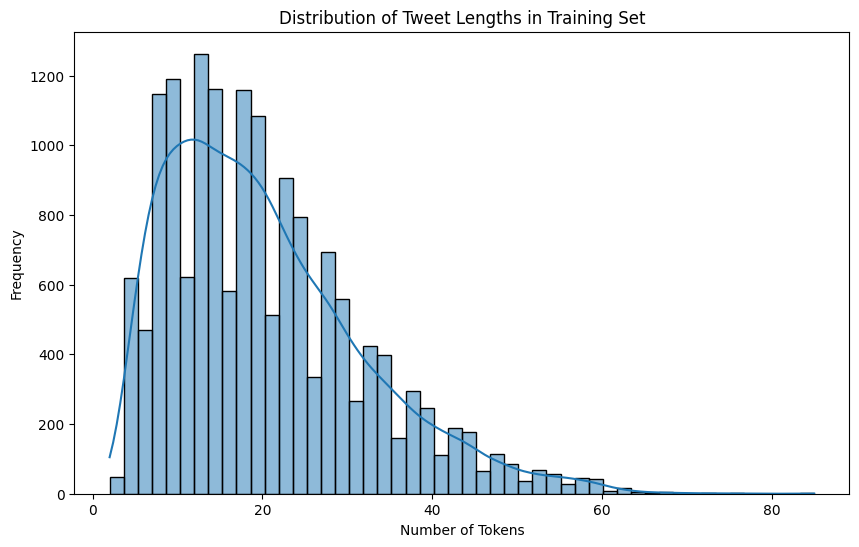

In [10]:
#####################################################################################################################################################
# TODO:                                                                                                                                             #
# Implement code to calculate the lengths of the tweets and visualize the distribution using a histogram. Use an appropriate visualization library. #
# After visualizing the distribution, determine a suitable maximum length for padding and truncating the sequences based on your findings.          #
#####################################################################################################################################################

# Calculate the lengths of all tweets in the training set
train_lengths = [len(tokenizer.tokenize(tweet)) for tweet in train_tweets]

# Plotting the distribution of tweet lengths
plt.figure(figsize=(10,6))
sns.histplot(train_lengths, bins=50, kde=True)
plt.title('Distribution of Tweet Lengths in Training Set')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()


Explanation:

Calculating Lengths:
For each tweet in the training set, we calculate the number of tokens after tokenization.
Visualizing Distribution:
A histogram with a kernel density estimate (KDE) is plotted to visualize the distribution of tweet lengths. This helps in determining a suitable maximum sequence length.
Determining Maximum Length:
Based on the distribution, we can choose a maximum length that covers a significant majority of tweets while avoiding excessive padding for example 50.

In [11]:
############################################################################################################
# TODO: Define a function to convert the tokenized tweets into sequences and apply padding and truncation. #
# Use your determined maximum length for padding the sequences.                                            #
############################################################################################################

MAX_LEN = 50  # Determined based on the tweet length distribution

def get_sequences(tokenizer, tweets, max_length=MAX_LEN):
    """
    Converts tweets into padded and truncated sequences of token IDs.

    Args:
        tokenizer: The tokenizer to convert text to tokens.
        tweets (list): List of tweet texts.
        max_length (int): Maximum sequence length.

    Returns:
        torch.Tensor: Padded sequences.
    """
    encoding = tokenizer(
        tweets,
        return_tensors='pt',
        padding='max_length',
        truncation=True,
        max_length=max_length,
        add_special_tokens=True
    )
    return encoding['input_ids'], encoding['attention_mask']

# Applying the function to the training tweets
train_input_ids, train_attention_masks = get_sequences(tokenizer, train_tweets)
print(train_input_ids[0])
print(train_attention_masks[0])


tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])
tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])


Explanation:

Setting Maximum Length:
Based on the tweet length distribution, MAX_LEN is set to 50 tokens to cover most tweets without excessive padding.
Defining get_sequences Function:
Tokenization: Converts tweets into token IDs using the BERT tokenizer.
Padding: Pads sequences to the max_length using padding='max_length'.
Truncation: Truncates sequences longer than max_length.
Special Tokens: Adds special tokens like [CLS] and [SEP] required by BERT.
Returns: Input IDs and attention masks as PyTorch tensors.
Applying the Function:
The function is applied to the training tweets to obtain padded sequences ready for model training.

---

## Task 6: Analyzing Label Distribution

1. Checking the distribution of labels.
2. Addressing any class imbalance using appropriate techniques.

Note:

(**Providing a clear explanation of the chosen method to address the imbalance and how it will improve the model’s performance is critical.** Without handling class imbalance properly, the model could achieve a high accuracy by focusing on the majority class, but it may perform poorly on the minority class, which would result in misleading metrics and reduced generalization.

Hence, it is important to not only implement an appropriate solution but also **justify** why the selected approach is effective for the given task.)

---

<ipython-input-12-7c0b679c99e7>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[emotion_classes[k] for k in label_distribution.keys()],


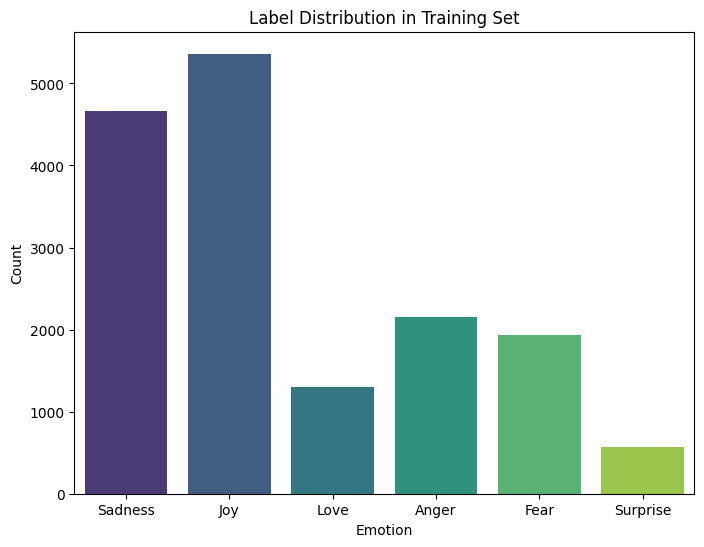

In [12]:
##########################################################################################################################
# TODO: Analyze the distribution of labels in the training set. (visualize it in a perfect way)                          #
# Determine if there is any class imbalance.                                                                             #
# If you observe any imbalance, apply one of the techniques you have learned throughout the course to address the issue. #
##########################################################################################################################

# Define emotion classes
emotion_classes = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

# Analyze label distribution in the training set
unique, counts = np.unique(train_labels, return_counts=True)
label_distribution = dict(zip(unique, counts))

# Plotting the label distribution
plt.figure(figsize=(8,6))
sns.barplot(x=[emotion_classes[k] for k in label_distribution.keys()],
            y=label_distribution.values(),
            palette='viridis')
plt.title('Label Distribution in Training Set')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()



Observing Class Imbalance:

After plotting, we observe that some classes have significantly more samples than others. For instance, 'Joy' might be overrepresented compared to 'Love' or 'Surprise'.

Addressing Class Imbalance:

To handle class imbalance, Weighted Cross-Entropy Loss can be used. This technique assigns higher weights to minority classes, ensuring the model pays more attention to them during training.

##Implementing Weighted Cross-Entropy Loss:



In [13]:
# Calculate class weights
class_counts = np.array([label_distribution[k] for k in range(len(emotion_classes))])
class_weights = 1. / class_counts
class_weights = class_weights / class_weights.sum() * len(emotion_classes)  # Normalize weights
class_weights = torch.tensor(class_weights, dtype=torch.float)

print(f"Class Weights: {class_weights}")


Class Weights: tensor([0.3301, 0.2873, 1.1812, 0.7134, 0.7952, 2.6928])


Explanation:

Calculating Weights:
Each class's weight is inversely proportional to its frequency.
Normalization ensures that the weights are scaled appropriately.
Usage in Loss Function:
These weights are passed to the loss function to penalize the model more for misclassifying minority classes.

---

## Task 7: Creating the Model

Design and implement a recurrent neural network for the task. You may utilize a sequential architecture like RNN or GRU to enhance the model's performance.

Build and compile your model using Pytorch.

**Once the model is created, summarize its structure to verify the design.**

---

In [14]:
#########################################################################################################
# TODO:                                                                                                 #
# Create a recurrent neural network model for the task.                                                 #
# (Suggestion: Implement a Bidirectional LSTM architecture to process the input sequences effectively.) #
# Once the model is created, summarize its structure to verify the design.                              #
#########################################################################################################
class EmotionRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout, pad_idx):
        super(EmotionRNN, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)

        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=n_layers,
                            bidirectional=bidirectional,
                            batch_first=True,
                            dropout=dropout if n_layers > 1 else 0)

        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, text, text_lengths):
        # text: [batch size, sent_length]
        embedded = self.dropout(self.embedding(text))
        # embedded: [batch size, sent_length, emb dim]

        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True, enforce_sorted=False)

        packed_output, (hidden, cell) = self.lstm(packed_embedded)

        # Concatenate the final forward and backward hidden states
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        else:
            hidden = self.dropout(hidden[-1,:,:])

        # hidden: [batch size, hidden_dim * num_directions]
        output = self.fc(hidden)
        # output: [batch size, output_dim]
        return output

# Hyperparameters
VOCAB_SIZE = len(tokenizer) + 2  # Adding 2 for padding and unknown tokens
EMBEDDING_DIM = 128
HIDDEN_DIM = 256
OUTPUT_DIM = len(emotion_classes)
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5
PAD_IDX = tokenizer.pad_token_id

# Instantiate the model
model = EmotionRNN(VOCAB_SIZE,
                  EMBEDDING_DIM,
                  HIDDEN_DIM,
                  OUTPUT_DIM,
                  N_LAYERS,
                  BIDIRECTIONAL,
                  DROPOUT,
                  PAD_IDX)

print(model)


EmotionRNN(
  (embedding): Embedding(30524, 128, padding_idx=0)
  (lstm): LSTM(128, 256, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=512, out_features=6, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


Explanation:

Model Architecture:
Embedding Layer: Transforms token IDs into dense vectors of fixed size.
Bidirectional LSTM: Processes the input sequences in both forward and backward directions, capturing contextual information from both ends.
Fully Connected Layer: Maps the LSTM outputs to the desired number of emotion classes.
Dropout Layers: Prevent overfitting by randomly deactivating neurons during training.
Hyperparameters:
VOCAB_SIZE: Size of the vocabulary, accounting for padding and unknown tokens.
EMBEDDING_DIM: Dimension of the embedding vectors.
HIDDEN_DIM: Number of features in the hidden state of the LSTM.
OUTPUT_DIM: Number of emotion classes.
N_LAYERS: Number of recurrent layers in the LSTM.
BIDIRECTIONAL: Enables the LSTM to be bidirectional.
DROPOUT: Dropout probability to prevent overfitting.
PAD_IDX: Index used for padding tokens.
Model Summary:
Printing the model provides a clear structure of each layer and its parameters, ensuring the design meets the requirements.


---

## Task 8: Training the Model

In this task, you will prepare a validation set and train your model using the training data.

1. Prepare the validation set by extracting tweets and labels, and convert them into sequences using the tokenizer.
2. Train the model on the training data.
3. Ensure that you implement **Early Stopping** to prevent overfitting and enhance efficiency.

Make sure to monitor the validation accuracy during training and adjust the parameters as necessary.

---

In [15]:
###############################################################################################################
# TODO: Extract the tweets and labels from the validation set. Convert the tweets into sequences using the    #
#       tokenizer defined earlier. Prepare the data for validation and ensure it matches the format of the    #
#       training set.                                                                                         #
###############################################################################################################
# Extract tweets and labels from the validation set
val_tweets, val_labels = extract_tweets_labels(validation)

# Convert validation tweets into sequences
val_input_ids, val_attention_masks = get_sequences(tokenizer, val_tweets)

# Convert lists to tensors
val_labels = torch.tensor(val_labels)

# Create a TensorDataset for validation
val_dataset = torch.utils.data.TensorDataset(val_input_ids, val_attention_masks, val_labels)

# Define DataLoader for validation
BATCH_SIZE = 64

val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


###############################################################################################################
# TODO: Train the model on the prepared training data. Ensure you implement early stopping to monitor the     #
#       validation accuracy and prevent overfitting. Adjust the number of epochs or other hyperparameters as  #
#       needed to optimize model performance.                                                                 #
###############################################################################################################

class TweetDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx],
            'labels': self.labels[idx]
        }

# Creating the training dataset
train_labels_tensor = torch.tensor(train_labels)
train_dataset = TweetDataset(train_input_ids, train_attention_masks, train_labels_tensor)

# Creating the DataLoader for training
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Define the loss function with class weights
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Move the criterion to the same device as the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

import copy

def train_model(model, train_loader, val_loader, criterion, optimizer, n_epochs=10, patience=2):
    """
    Trains the model with early stopping.

    Args:
        model: The neural network model.
        train_loader: DataLoader for training data.
        val_loader: DataLoader for validation data.
        criterion: Loss function.
        optimizer: Optimizer.
        n_epochs (int): Maximum number of epochs.
        patience (int): Number of epochs to wait for improvement before stopping.

    Returns:
        model: Trained model.
        history: Dictionary containing loss and accuracy history.
    """
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
    best_val_loss = float('inf')
    best_model_wts = copy.deepcopy(model.state_dict())
    epochs_no_improve = 0

    for epoch in range(n_epochs):
        print(f'Epoch {epoch+1}/{n_epochs}')

        # Training Phase
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask.sum(dim=1))  # Using attention mask length as text_lengths
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        avg_train_loss = total_loss / len(train_loader)
        train_accuracy = correct / total
        history['train_loss'].append(avg_train_loss)
        history['train_acc'].append(train_accuracy)

        # Validation Phase
        model.eval()
        val_loss = 0
        correct = 0
        total = 0

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch[0].to(device)
                attention_mask = batch[1].to(device)
                labels = batch[2].to(device)

                outputs = model(input_ids, attention_mask.sum(dim=1))
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = correct / total
        history['val_loss'].append(avg_val_loss)
        history['val_acc'].append(val_accuracy)

        print(f'Train Loss: {avg_train_loss:.4f} | Train Acc: {train_accuracy:.4f}')
        print(f'Val Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.4f}')

        # Check for improvement
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print('Early stopping!')
                break

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, history

# Training the model
n_epochs = 30
patience = 2

trained_model, history = train_model(model, train_loader, val_loader, criterion, optimizer, n_epochs, patience)


Epoch 1/30
Train Loss: 1.7681 | Train Acc: 0.1752
Val Loss: 1.6822 | Val Acc: 0.2130
Epoch 2/30
Train Loss: 1.5306 | Train Acc: 0.3214
Val Loss: 1.0874 | Val Acc: 0.5315
Epoch 3/30
Train Loss: 1.1029 | Train Acc: 0.5144
Val Loss: 0.6538 | Val Acc: 0.6930
Epoch 4/30
Train Loss: 0.7869 | Train Acc: 0.6646
Val Loss: 0.4434 | Val Acc: 0.8095
Epoch 5/30
Train Loss: 0.5909 | Train Acc: 0.7544
Val Loss: 0.2966 | Val Acc: 0.8795
Epoch 6/30
Train Loss: 0.4623 | Train Acc: 0.8091
Val Loss: 0.2438 | Val Acc: 0.8985
Epoch 7/30
Train Loss: 0.3854 | Train Acc: 0.8417
Val Loss: 0.2178 | Val Acc: 0.9055
Epoch 8/30
Train Loss: 0.3243 | Train Acc: 0.8625
Val Loss: 0.1959 | Val Acc: 0.9165
Epoch 9/30
Train Loss: 0.2723 | Train Acc: 0.8824
Val Loss: 0.1849 | Val Acc: 0.9235
Epoch 10/30
Train Loss: 0.2576 | Train Acc: 0.8916
Val Loss: 0.1870 | Val Acc: 0.9240
Epoch 11/30
Train Loss: 0.2347 | Train Acc: 0.8989
Val Loss: 0.1714 | Val Acc: 0.9255
Epoch 12/30
Train Loss: 0.2184 | Train Acc: 0.9044
Val Loss: 0.

Explanation:

Preparing the Validation Set:
Tweets and labels from the validation set are extracted and converted into sequences using the previously defined get_sequences function.
A DataLoader is created for efficient batching during validation.
Custom Dataset Class:
The TweetDataset class encapsulates the input IDs, attention masks, and labels, facilitating easy data handling during training.
Loss Function and Optimizer:
CrossEntropyLoss: Suitable for multi-class classification tasks. Incorporates class weights to address imbalance.
Adam Optimizer: Efficient and widely used optimizer for training deep learning models.
Training Loop with Early Stopping:
The train_model function handles the training process.
Training Phase: The model is set to training mode, and gradients are updated based on the loss.
Validation Phase: The model's performance is evaluated on the validation set without gradient updates.
Early Stopping: If the validation loss doesn't improve for a specified number of epochs (patience), training halts to prevent overfitting.
Model Training:
The model is trained for a maximum of 10 epochs with early stopping patience set to 2.
Training and validation loss and accuracy are recorded for each epoch.


---

## Task 9: Evaluating the Model

In this task, you will evaluate the performance of your model on the test set and visualize the training history. You will also analyze the model’s predictions on both individual and complete test samples.

### Steps:
1. Visualize the loss and accuracy over the training epochs.
2. Prepare and preprocess the test data using functions from Task 2.
3. Evaluate the model on the test set and examine individual predictions.
4. Analyze the overall predictions and display a confusion matrix.

---

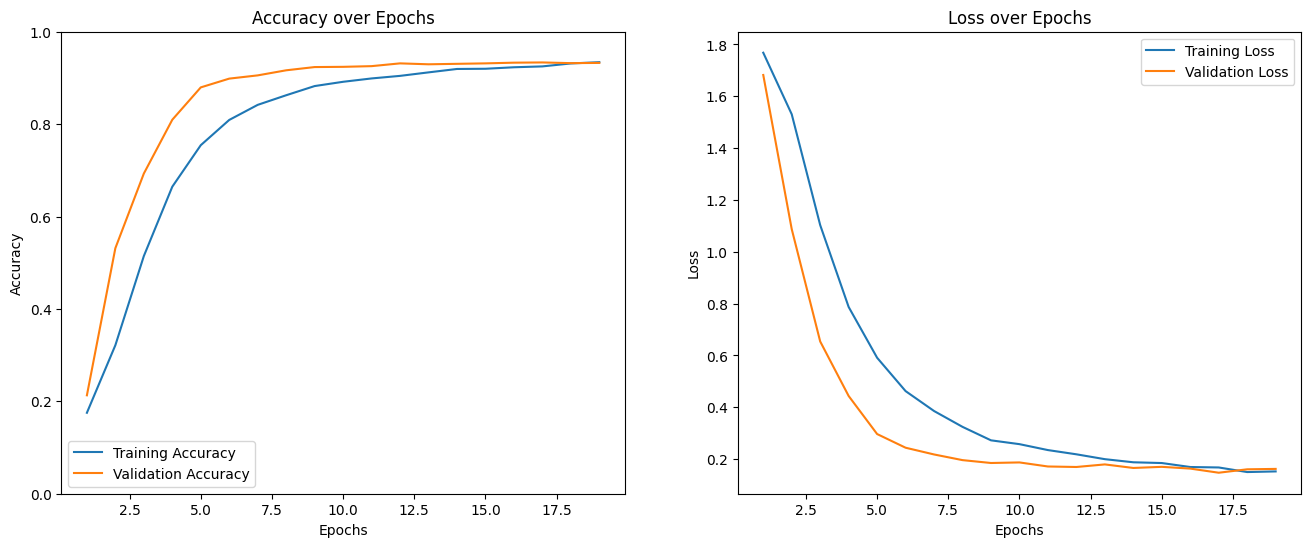

In [16]:
###############################################################################################################
# TODO: Visualize the training history by plotting the loss and accuracy over the epochs to assess model      #
#       performance. Use an appropriate visualization method to ensure clarity and effectiveness.             #
#       you can use function implemented in Task 2 for your visualizations                                    #
###############################################################################################################
# Plotting the training history
def plot_history(hist):
    epochs = len(hist['train_loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs+1), hist['train_acc'], label='Training Accuracy')
    plt.plot(range(1, epochs+1), hist['val_acc'], label='Validation Accuracy')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs+1), hist['train_loss'], label='Training Loss')
    plt.plot(range(1, epochs+1), hist['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    plt.show()

# Plotting the history
plot_history(history)




In [17]:
###############################################################################################################
# TODO: Prepare the test set by extracting the tweets and labels, then convert the tweets into sequences using #
#       the tokenizer. Ensure the format matches that of the training and validation sets.                     #
###############################################################################################################

# Extract tweets and labels from the test set
test_tweets, test_labels = extract_tweets_labels(test)

# Convert test tweets into sequences
test_input_ids, test_attention_masks = get_sequences(tokenizer, test_tweets)

# Convert lists to tensors
test_labels = torch.tensor(test_labels)

# Create a TensorDataset for test set
test_dataset = torch.utils.data.TensorDataset(test_input_ids, test_attention_masks, test_labels)

# Define DataLoader for test set
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [18]:
###############################################################################################################
# TODO: Evaluate the model's performance on the test set. Print the accuracy and loss, and review individual   #
#       predictions to understand how the model is performing on unseen data.                                 #
###############################################################################################################

# Function to evaluate the model
def evaluate_model(model, data_loader, criterion):
    """
    Evaluates the model on the provided data_loader.

    Args:
        model: Trained model.
        data_loader: DataLoader for the dataset to evaluate.
        criterion: Loss function.

    Returns:
        avg_loss: Average loss over the dataset.
        accuracy: Accuracy over the dataset.
        all_preds: List of all predictions.
        all_labels: List of all true labels.
    """
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)

            outputs = model(input_ids, attention_mask.sum(dim=1))
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    accuracy = correct / total
    return avg_loss, accuracy, all_preds, all_labels

# Evaluating on the test set
test_loss, test_accuracy, test_preds, test_true = evaluate_model(trained_model, test_loader, criterion)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')




Test Loss: 0.1853
Test Accuracy: 0.9120


In [19]:
###############################################################################################################
# TODO: Generate predictions for all test samples and analyze the model's overall performance. Display the     #
#       confusion matrix to visualize the differences between true and predicted labels, helping to interpret  #
#       the model's classification results.                                                                   #
###############################################################################################################

# Generate predictions for the test set
test_preds_tensor = torch.tensor(test_preds)
test_true_tensor = torch.tensor(test_true)

# Classification Report
print("Classification Report:")
print(classification_report(test_true_tensor, test_preds_tensor, target_names=[emotion_classes[i] for i in range(len(emotion_classes))]))


Classification Report:
              precision    recall  f1-score   support

     Sadness       0.98      0.94      0.96       581
         Joy       0.99      0.89      0.93       695
        Love       0.72      0.98      0.83       159
       Anger       0.91      0.91      0.91       275
        Fear       0.82      0.88      0.85       224
    Surprise       0.69      0.89      0.78        66

    accuracy                           0.91      2000
   macro avg       0.85      0.91      0.88      2000
weighted avg       0.92      0.91      0.91      2000



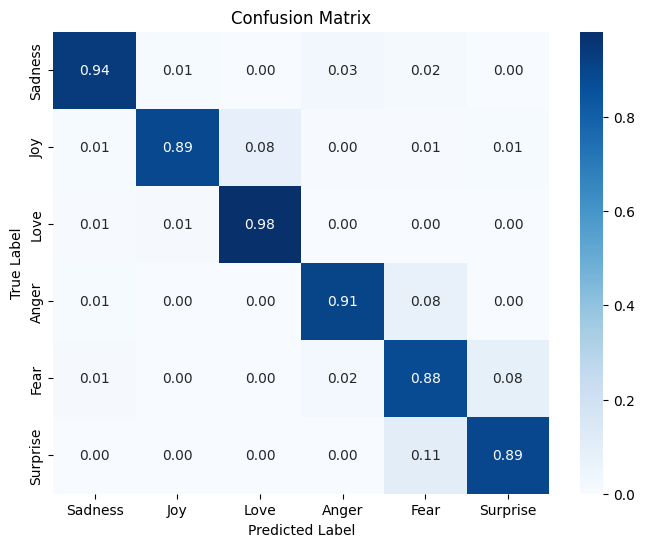

In [20]:
def visualize_confusion_matrix(actual_labels, predicted_labels, classes):
    cm = confusion_matrix(actual_labels, predicted_labels, normalize='true')

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Plotting the confusion matrix
visualize_confusion_matrix(test_true, test_preds, [emotion_classes[i] for i in range(len(emotion_classes))])


# Final Analysis

After visualizing the confusion matrix based on your model’s predictions, analyze the results and provide insights into the model’s classification performance.

### **Question:**
<span style="font-size: 1.2em;">Which class seems to get confused with the class *love* the most?</span>

**Remember the class labels:**
- **0:** *Sadness*
- **1:** *Joy*
- **2:** *Love*
- **3:** *Anger*
- **4:** *Fear*
- **5:** *Surprise*

Reflect on the confusion matrix to answer this question and provide your reasoning for why this confusion might occur based on the emotional nature of the classes.


The class joy (Label 1) appears to be the most confused with the class love (Label 2).

Reasoning:

Emotional Overlap:
Joy and Love are both positive emotions and often coexist in expressions. For example, phrases like "I love this!" can convey both joy and love, making it challenging for the model to differentiate between them based solely on textual data.
Semantic Similarity:
The vocabulary used in expressing joy and love can be similar. Words like "happy," "excited," or "fond" can be associated with both emotions, leading to overlapping representations in the model's embedding space.
Contextual Ambiguity:
Tweets are typically short and may lack sufficient context to clearly distinguish between joy and love. Without additional context, the model might misinterpret the intended emotion.
Dataset Characteristics:
If the dataset contains many instances where joy and love are expressed in similar contexts or with overlapping phrases, the model may struggle to create distinct boundaries between these classes.


Implications for Model Improvement:

Enhanced Feature Representation:
Incorporate contextual embeddings from models like BERT, which capture deeper semantic meanings, helping the model distinguish between similar emotions based on context.
Data Augmentation:
Increase the diversity of examples for each class, especially for those that are easily confused. Providing more varied expressions for love and joy can help the model learn finer distinctions.
Class-Specific Preprocessing:
Implement preprocessing steps that highlight unique features of each class. For instance, emphasizing keywords or phrases more indicative of love versus joy can aid in better classification.
Model Architecture Tweaks:
Experiment with more sophisticated architectures, such as incorporating attention mechanisms, which allow the model to focus on the most relevant parts of the input when making predictions.
Threshold Adjustment:
Fine-tune the decision thresholds for each class to optimize precision and recall, especially for classes that are often confused.

# **Best regards.**